# **Analyzing Transcripts in Resident Evil: The Actual Work**
## **Step 4: Analyzing the Data**
Once our data has been extracted, cleaned, and saved, we can finally start enriching and analyzing the transcripts. We'll do this using the [`os`](https://docs.python.org/3/library/os.html) module, the [`pandas`](https://pandas.pydata.org/) library, and the [`matplotlib`](https://matplotlib.org/) library.

If you read the `RE_Data_Setup.ipynb` notebook (or looked at the contents of the folder), you'll know that we saved our data into .csv files. For simplicity, we're going to combine all of the data stored in these .csv files into one large dataset, adding new columns called **Game** and **Year** to help us identify data sources. To do this task, we need to map each file to its corresponding game.

### Why didn't you lump everything together from the start?
Even though we're focused on analyzing *Resident Evil* data, we don't always need to compare all thirteen games against each other. Sometimes, we might want to focus on a specific subset of games (i.e. comparing *Resident Evil 2* (1998) to its remake (2019)). Splitting the dataset into multiple files makes it easier for us to manage the individual datasets.

In [168]:
import os
import pandas

# Copied and pasted from RE_Data_Setup.ipynb (Step 1)
def get_path_to_file(file: str) -> str:
    """Returns the path to a file in the working directory.
    Note that there is not error-checking, so the function will return a path
    even if the file doesn't exist within the working directory."""
    return os.path.realpath(file)

# Map each file to the appropriate game
file_list = {'RE0_Transcript.csv': 'Resident Evil 0',
             'RE1_Transcript.csv': 'Resident Evil 1',
             'RE2_Transcript.csv': 'Resident Evil 2',
             'RE2_Remake_Transcript.csv': 'Resident Evil 2 Remake',
             'RE3_Transcript.csv': 'Resident Evil 3',
             'RE3_Remake_Transcript.csv': 'Resident Evil 3 Remake',
             'REV_Transcript.csv': 'Resident Evil Code Veronica',
             'RE4_Transcript.csv': 'Resident Evil 4',
             'RE4_Remake_Transcript.csv': 'Resident Evil 4 Remake',
             'RE5_Transcript.csv': 'Resident Evil 5',
             'RE6_Transcript.csv': 'Resident Evil 6',
             'RE7_Transcript.csv': 'Resident Evil 7',
             'RE8_Transcript.csv': 'Resident Evil Village'
            }

# Map each game to a year
game_years = {'Resident Evil 0': 2002,
              'Resident Evil 1': 1996,
              'Resident Evil 2': 1998,
              'Resident Evil 3': 1999,
              'Resident Evil Code Veronica': 2000,
              'Resident Evil 4': 2005,
              'Resident Evil 5': 2009,
              'Resident Evil 6': 2012,
              'Resident Evil 7': 2017,
              'Resident Evil Village': 2021,
              'Resident Evil 2 Remake': 2019,
              'Resident Evil 3 Remake': 2020,
              'Resident Evil 4 Remake': 2023}

data_set = []
for file, game in file_list.items():
    temp = pandas.read_csv(get_path_to_file(file))
    temp['Game'] = game
    temp['Year'] = game_years[game]
    temp.insert(0, 'Game', temp.pop('Game')) # Shift the columns
    temp.insert(1, 'Year', temp.pop('Year'))
    data_set.append(temp)

re_data = pandas.concat(data_set, ignore_index = True)
re_data

,Game,Year,Character,Gender,Line
0,Resident Evil 0,2002,Narrator,NaN,A small mid-western town in America: Raccoon C...
1,Resident Evil 0,2002,Man 1,Male,Really?
2,Resident Evil 0,2002,Woman,Female,"Hmm, do you think so too?"
3,Resident Evil 0,2002,Man 2,Male,Yeah.
4,Resident Evil 0,2002,Man 3,Male,...do about it?
...,...,...,...,...,...
8560,Resident Evil Village,2021,Man,Male,We have a clear shot.
8561,Resident Evil Village,2021,Man In Black,Male,Stand down. I can handle it. She's just a kid.
8562,Resident Evil Village,2021,Rose,Female,"Way to keep it together, Rose."
8563,Resident Evil Village,2021,Man In Black,Male,"You're a lot like him, you know?"


Here are some questions we can try to answer with our large dataset.

## **Question 1: How much do people talk in the Resident Evil games?**
To answer this question, we can look at the total number of lines transcribed for all the Resident Evil games.

In [169]:
re_dialogue_counts = re_data.groupby(['Game', 'Year'])['Line'].count()
re_dialogue_counts

Game                         Year
Resident Evil 0              2002     233
Resident Evil 1              1996     689
Resident Evil 2              1998     798
Resident Evil 2 Remake       2019     977
Resident Evil 3              1999     289
Resident Evil 3 Remake       2020     456
Resident Evil 4              2005     487
Resident Evil 4 Remake       2023    1092
Resident Evil 5              2009     694
Resident Evil 6              2012    1279
Resident Evil 7              2017     392
Resident Evil Code Veronica  2000     366
Resident Evil Village        2021     813
Name: Line, dtype: int64

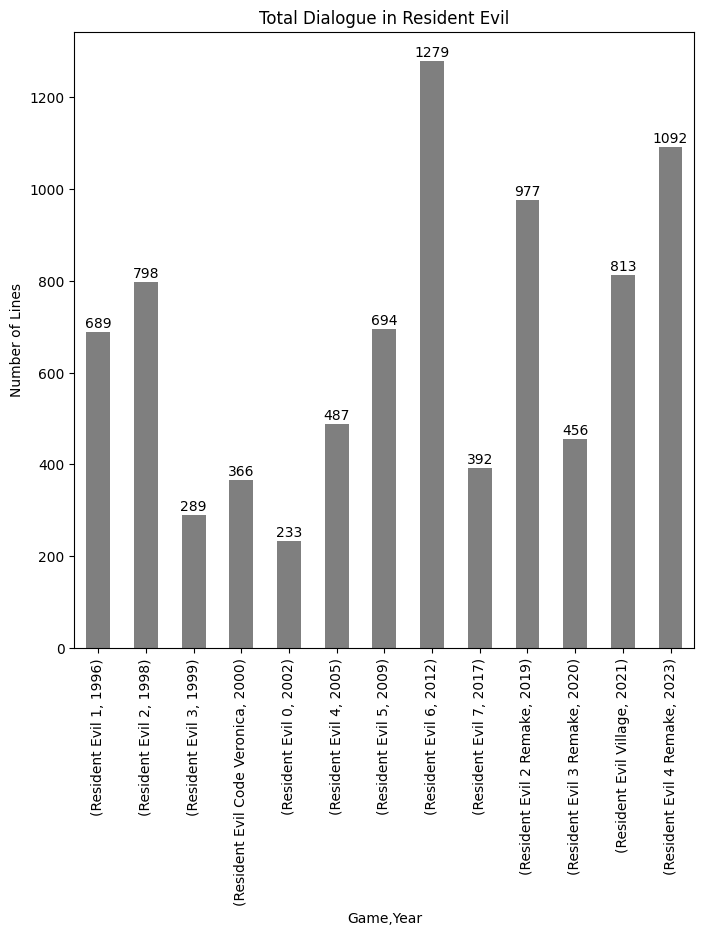

In [184]:
import matplotlib.pyplot as plt

# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Total Dialogue in Resident Evil')
ax.set_xlabel('Game')
ax.set_ylabel('Number of Lines')

# Plot the data
re_dialogue_counts = re_dialogue_counts.sort_index(level='Year')
ax = re_dialogue_counts.plot(kind = 'bar', color = ['#7F7F7F'])
# Annotate the data
for patch in ax.patches:
    ax.annotate(f'{patch.get_height()}', (patch.get_x() + patch.get_width() / 2,
                                          patch.get_height() + 10), ha = 'center')

plt.show()

## **Question 2: How often do female characters speak compared to male characters?**

In [171]:
# Count the frequencies within the dataset
re_gender_counts = re_data.groupby(['Game', 'Year'])['Gender'].value_counts()
re_gender_counts

Game                         Year  Gender
Resident Evil 0              2002  Male      125
                                   Female     93
Resident Evil 1              1996  Male      391
                                   Female    292
Resident Evil 2              1998  Female    431
                                   Male      306
Resident Evil 2 Remake       2019  Female    505
                                   Male      378
Resident Evil 3              1999  Male      148
                                   Female    114
Resident Evil 3 Remake       2020  Male      245
                                   Female    188
Resident Evil 4              2005  Male      356
                                   Female    112
Resident Evil 4 Remake       2023  Male      753
                                   Female    286
Resident Evil 5              2009  Male      395
                                   Female    284
Resident Evil 6              2012  Male      876
                           

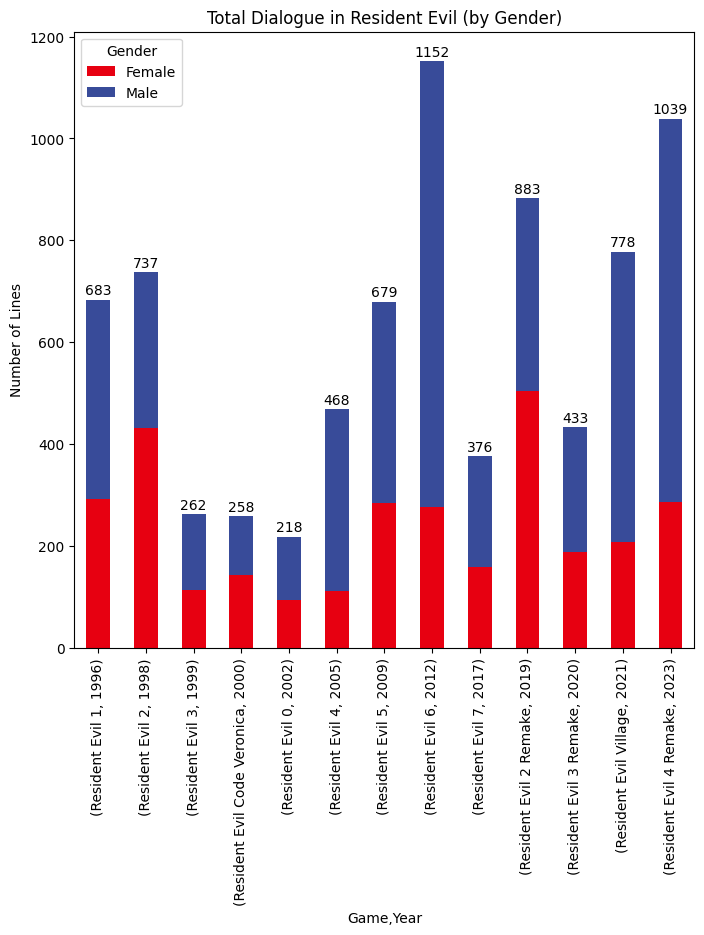

In [183]:
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Total Dialogue in Resident Evil (by Gender)')
ax.set_xlabel('Game')
ax.set_ylabel('Number of Lines')

# Plot the data
gender_counts_pivot = re_gender_counts.unstack(fill_value = 0)
gender_counts_pivot = gender_counts_pivot.sort_index(level = 'Year')
gender_counts_pivot.plot(kind = 'bar', stacked = True, 
                         color = ['#E70011', '#384B99'], ax = ax)

# Annotate the data
for i, patch in enumerate(ax.patches):
    if (i % len(gender_counts_pivot.columns) == 0):
        total_height = int(sum(p.get_height() for p in ax.patches 
                               if p.get_x() == patch.get_x()))
        ax.annotate(f'{total_height}', (patch.get_x() + patch.get_width() / 2,
                                          total_height + 10), ha = 'center')

plt.show()

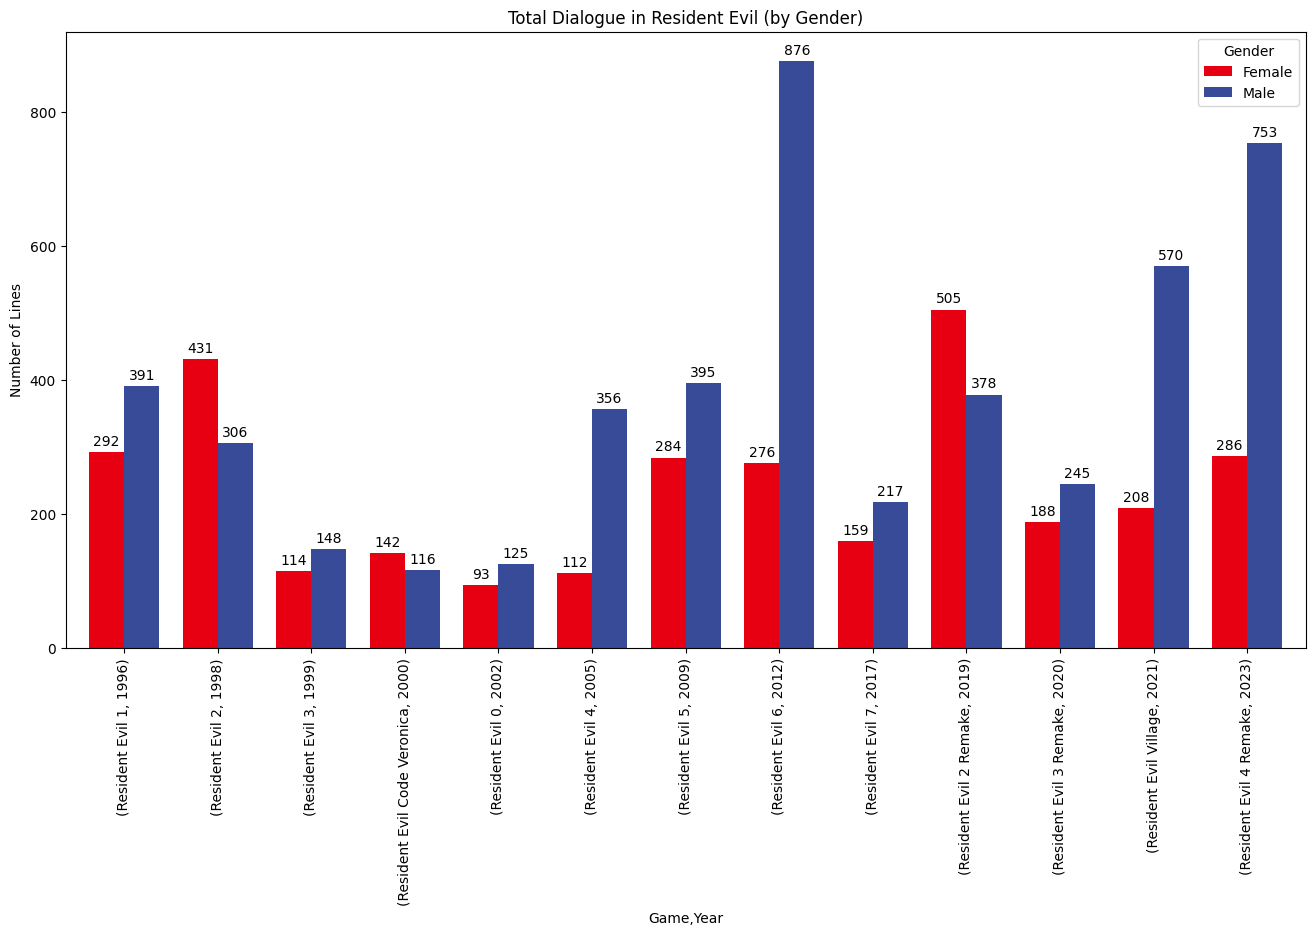

In [182]:
# An alternate way of viewing the data
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title('Total Dialogue in Resident Evil (by Gender)')
ax.set_xlabel('Game')
ax.set_ylabel('Number of Lines')

# Plot the data
gender_counts_pivot = re_gender_counts.unstack(fill_value = 0)
gender_counts_pivot = gender_counts_pivot.sort_index(level = 'Year')
gender_counts_pivot.plot(kind = 'bar', stacked = False, 
                         color = ['#E70011', '#384B99'], ax = ax, width = 0.75)
# Annotate the data
for patch in ax.patches:
    ax.annotate(f'{patch.get_height()}', (patch.get_x() + patch.get_width() / 2,
                                          patch.get_height() + 10), ha = 'center')

plt.show()

## **How long do female characters speak compared to male characters**?
To answer this question, we need to remove emotes and actions (i.e. gasps) from the dialogue. We can achieve this using a regex; the one we used is `\(.*)`, which will capture any characters contained within a set of parentheses (including the parentheses themselves).

In [174]:
import re

def remove_stage_directions(line: str) -> str:
    """Removes stage directions from lines of dialogues.
    Stage directions are phrases contained within parentheses.
    """
    return re.sub("\(.*\)", '', line)

# Copy the data into a new dataframe
re_data_words = re_data
# Remove stage directions from the dataset
re_data_words['Line'] = re_data_words['Line'].apply(remove_stage_directions)
# Count the number of words in each character's dialogue
re_data_words['Words'] = re_data['Line'].apply(lambda x: len(x.split(' ')))
re_data_words

,Game,Year,Character,Gender,Line,Words
0,Resident Evil 0,2002,Narrator,NaN,A small mid-western town in America: Raccoon C...,100
1,Resident Evil 0,2002,Man 1,Male,Really?,1
2,Resident Evil 0,2002,Woman,Female,"Hmm, do you think so too?",6
3,Resident Evil 0,2002,Man 2,Male,Yeah.,1
4,Resident Evil 0,2002,Man 3,Male,...do about it?,3
...,...,...,...,...,...,...
8560,Resident Evil Village,2021,Man,Male,We have a clear shot.,5
8561,Resident Evil Village,2021,Man In Black,Male,Stand down. I can handle it. She's just a kid.,10
8562,Resident Evil Village,2021,Rose,Female,"Way to keep it together, Rose.",6
8563,Resident Evil Village,2021,Man In Black,Male,"You're a lot like him, you know?",7


In [175]:
re_word_counts = round(re_data_words.groupby(['Game', 'Year', 'Gender'])['Words'].mean(), 2)
re_word_counts.dropna()
re_word_counts

Game                         Year  Gender
Resident Evil 0              2002  Female     6.55
                                   Male       9.62
Resident Evil 1              1996  Female     6.91
                                   Male      10.09
Resident Evil 2              1998  Female     9.16
                                   Male       8.91
Resident Evil 2 Remake       2019  Female     7.07
                                   Male       7.70
Resident Evil 3              1999  Female     7.65
                                   Male      12.53
Resident Evil 3 Remake       2020  Female     6.42
                                   Male      12.38
Resident Evil 4              2005  Female     6.64
                                   Male       9.53
Resident Evil 4 Remake       2023  Female     5.76
                                   Male       7.90
Resident Evil 5              2009  Female     7.81
                                   Male       8.61
Resident Evil 6              2012  Femal

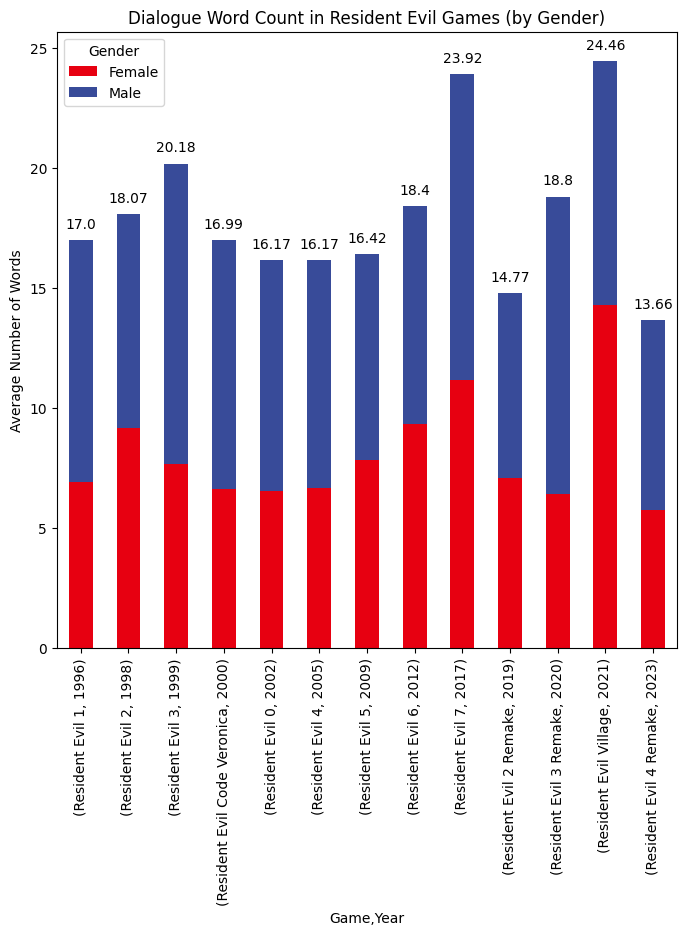

In [176]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Dialogue Word Count in Resident Evil Games (by Gender)')
ax.set_xlabel('Game')
ax.set_ylabel('Average Number of Words')

# Plot the data
word_counts_pivot = re_word_counts.unstack(fill_value = 0)
word_counts_pivot = word_counts_pivot.sort_index(level = 'Year')
word_counts_pivot.plot(kind = 'bar', stacked = True, 
                         color = ['#E70011', '#384B99'], ax = ax)

# Annotate the data
for i, patch in enumerate(ax.patches):
    if (i % len(word_counts_pivot.columns) == 0):
        total_height = round(sum(p.get_height() for p in ax.patches 
                             if p.get_x() == patch.get_x()), 2)
        ax.annotate(f'{total_height}', (patch.get_x() + patch.get_width() / 2,
                                          total_height + 0.5), ha = 'center')


plt.show()

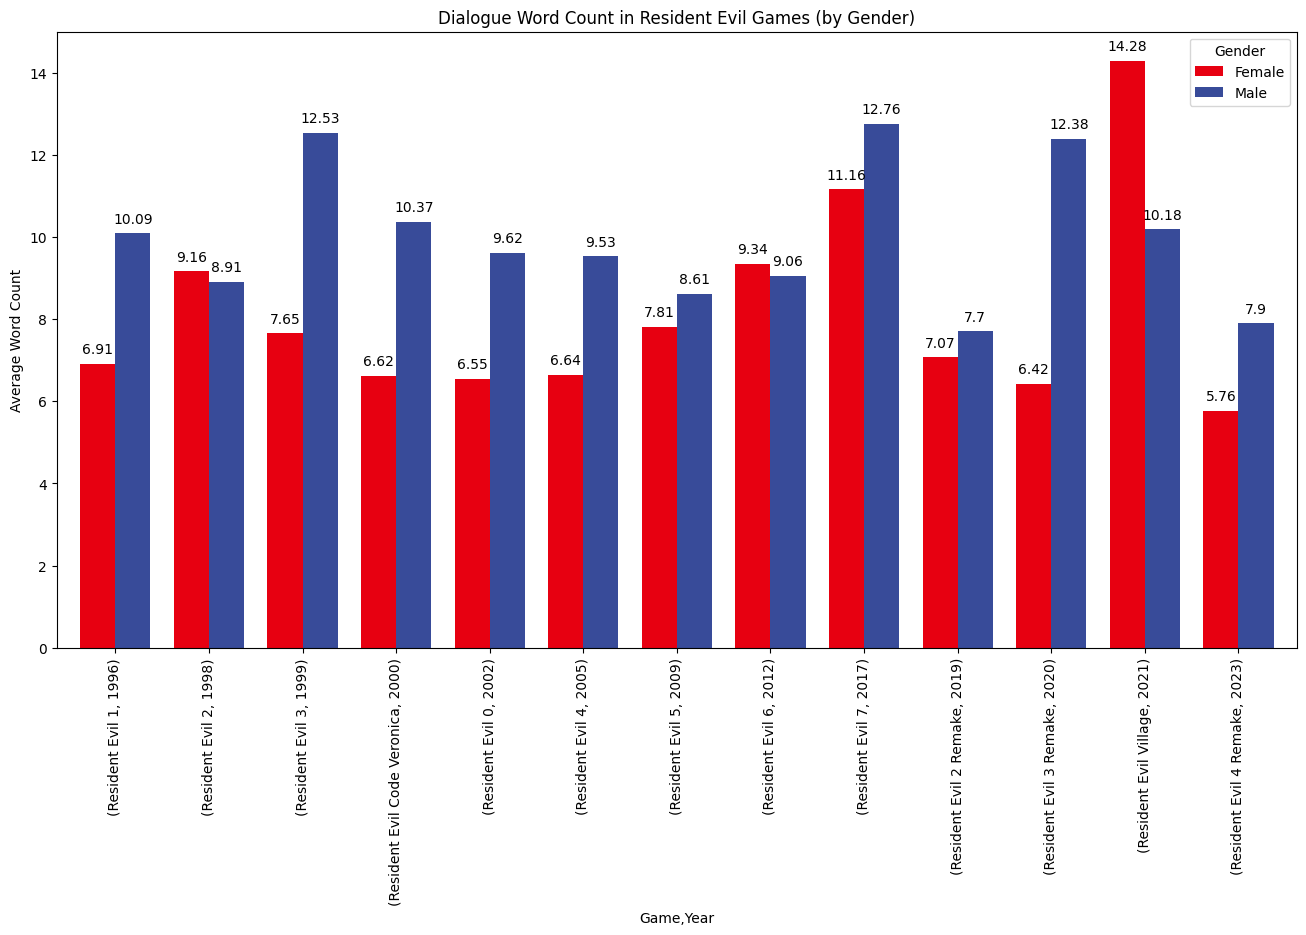

In [190]:
# An alternate way of viewing the data
# Create the visualization (bar chart)
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title('Dialogue Word Count in Resident Evil Games (by Gender)')
ax.set_xlabel('Game')
ax.set_ylabel('Average Word Count')

# Plot the data
word_counts_pivot = re_word_counts.unstack(fill_value = 0)
word_counts_pivot = word_counts_pivot.sort_index(level = 'Year')
word_counts_pivot.plot(kind = 'bar', stacked = False, 
                         color = ['#E70011', '#384B99'], ax = ax, width = 0.75)

# Annotate the data
for patch in ax.patches:
    ax.annotate(f'{patch.get_height()}', (patch.get_x() + patch.get_width() / 2,
                                          patch.get_height() + 0.25), ha = 'center')

plt.show()

## **Question 3: Who speaks the most in the entire Resident Evil series?**

In [283]:
# Count the frequencies within the dataset
re_character_counts_overall = re_data['Character'].value_counts()
# Get the Top 10 characters
re_character_counts_overall[:10]

Character
Leon      1308
Chris      813
Claire     634
Jill       509
Ethan      437
Sherry     390
Ashley     281
Jake       261
Ada        255
Piers      241
Name: count, dtype: int64

In [284]:
from matplotlib import colors

def get_interpolated_color(t: int, start_color: str, end_color: str) -> tuple:
    """Returns a color interpolated between two colors.
    Colors are returned in the RGBA format.
    """
    r0, g0, b0 = colors.hex2color(start_color)
    r1, g1, b1 = colors.hex2color(end_color)
    r = r0 + t * (r1 - r0)
    g = g0 + t * (g1 - g0)
    b = b0 + t * (b1 - b0)
    a = 1
    return (r, g, b, a)

def get_colors(steps: int, start_color: str, end_color: str) -> list:
    """Returns a series of interpolated colors.
    Colors are returned in the RGBA format.
    """
    return [get_interpolated_color((1 / (steps - 1)) * i, start_color, end_color)
            for i in range(steps)]

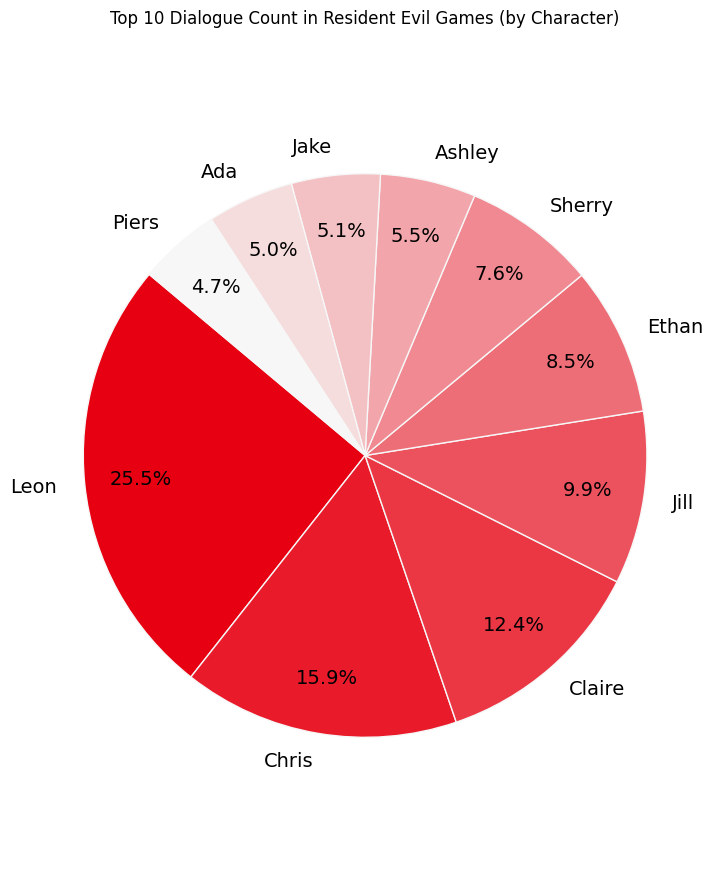

In [376]:
# Create the visualization (pie chart)
fig, ax = plt.subplots(figsize=(8, 11))
ax.set_title('Top 10 Dialogue Count in Resident Evil Games (by Character)')

# Plot the data
ax.pie(re_character_counts_overall[:10], 
       labels = re_character_counts_overall[:10].index, autopct = '%1.1f%%', 
       pctdistance = 0.80, colors = get_colors(10, '#E70011', '#F7F7F7'), 
       wedgeprops = {'edgecolor': '#F7F7F7'}, startangle = 140)

# Customize the annotations
for text in ax.texts:
    text.set_fontsize(14)

plt.axis('equal')
plt.show()

The results of the pie chart are not too surprising. Characters who are **major playable characters** in certain games (including the remakes) are likely to have more lines than other characters. **Leon**, for instance, is a protagonist in five different games (*Resident Evil 2*, *Resident Evil 4*, *Resident Evil 6*, the *Resident Evil 2* remake, and the *Resident Evil 4* remake). It is, however, surprising to note that Chris, the character with the greatest number of cameos, has fewer lines than Leon.

## **Question 4: Who is the most mentioned character in Resident Evil?**

In [372]:
# Track all of the characters in the Resident Evil franchise
all_characters = set(re_data['Character'].unique())

# Create a copy (so changes we apply now don't affect the original dataset)
re_copy = re_data.copy()

# Count the number of times another character is mentioned
# in another character's line
def replace_punctuation(line: str) -> str:
    """Replaces all the punctuation within a line of dialogue."""
    return re.sub(r'[^\w\s\'-]', '', line)

def replace_possessives(line: str) -> str:
    """Replaces possessive forms with non-possessive forms"""
    return re.sub(r"(\w+)'s\b", r"\1s", line)

def get_character_mentions(speaker: str, line: str) -> tuple:
    """Returns all the characters mentioned within a line of dialogue."""
    line = replace_punctuation(line)
    line = replace_possessives(line)
    characters = set(line.split()).intersection(all_characters)
    characters.discard(speaker)
    return characters

re_copy['Mentions'] = re_copy.apply(lambda x: get_character_mentions(x['Character'], x['Line']), axis = 1)
mention_counts = re_copy['Mentions'].explode().dropna().value_counts()
mention_counts

Mentions
Leon      190
Jill      175
Chris     166
Sherry    136
Claire    120
         ... 
Woman       1
Anton       1
Roxana      1
Canine      1
Tundra      1
Name: count, Length: 88, dtype: int64

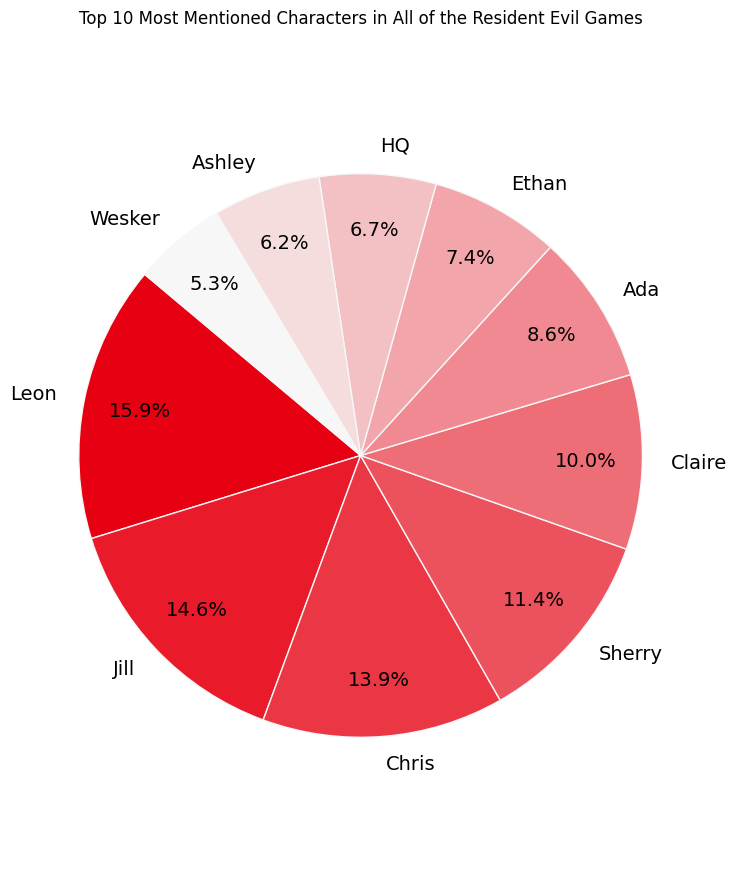

In [379]:
# Create the visualization (pie chart)
fig, ax = plt.subplots(figsize=(8, 11))
ax.set_title('Top 10 Most Mentioned Characters in All of the Resident Evil Games')

# Plot the data
ax.pie(mention_counts[:10], 
       labels = mention_counts[:10].index, autopct = '%1.1f%%', 
       pctdistance = 0.80, colors = get_colors(10, '#E70011', '#F7F7F7'), 
       wedgeprops = {'edgecolor': '#F7F7F7'}, startangle = 140)

# Customize the annotations
for text in ax.texts:
    text.set_fontsize(14)

plt.axis('equal')
plt.show()

The results of this pie chart are not too surprising either. With the exception of HQ, all of the characters mentioned in this pie chart are **major playable characters** whose names will naturally be mentioned more often by other characters due to game plot or game action needs. This is especially true for characters that are frequently paired or set against other characters, such as Leon, Jill, and Chris.